<a href="https://colab.research.google.com/github/approjecthub/Machine-learning/blob/master/Employee_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import modules
import numpy as np
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/approjecthub/Machine-learning/master/Datasets/HR_comma_sep.csv')
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


* satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
* last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
* number_projects: How many numbers of projects assigned to an employee?
* average_monthly_hours: How many average numbers of hours worked by an employee in a month?
* time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
* work_accident: Whether an employee has had a work accident or not.
* promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
* Departments: Employee's working department/division.
* Salary: Salary level of the employee such as low, medium and high.
* left: Whether the employee has left the company or not.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [0]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Data visualisation
* Employees Left

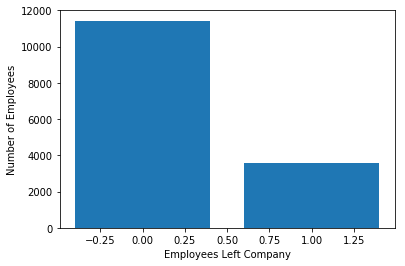

In [0]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [0]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Number of Projects

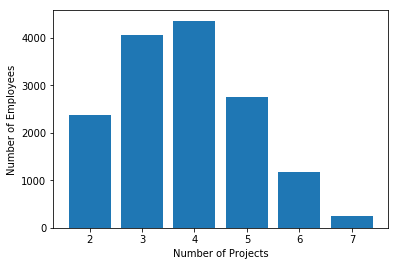

In [0]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

* Most of the employee is doing the project from 3-5.

### Time Spent in Company

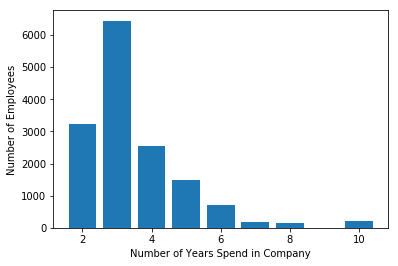

In [0]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

### Subplots using Seaborn

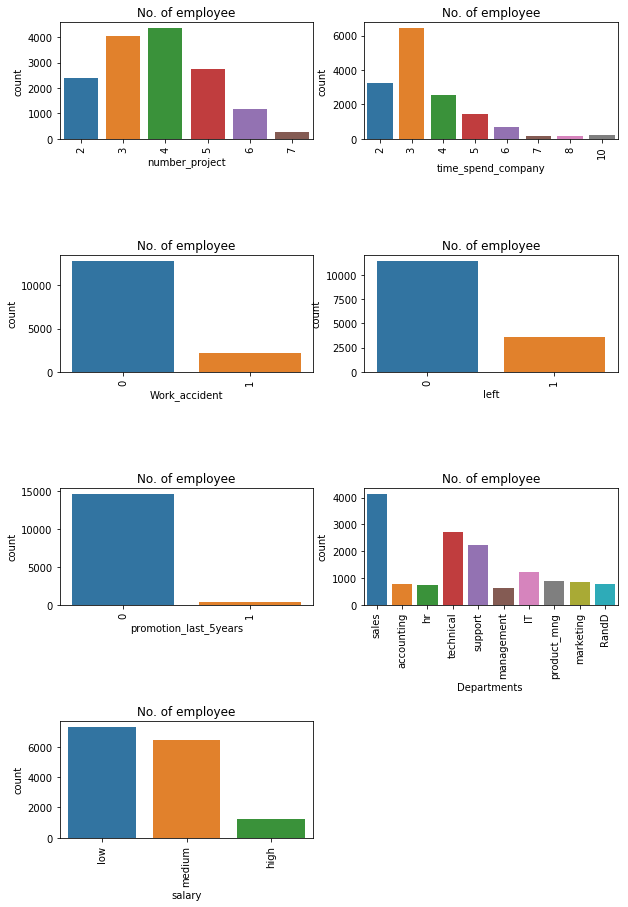

In [0]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

* Most of the employee is doing the project from 3-5.
* There is a huge drop between 3 years and 4 years experienced employee.
* The no of employee left is 23 % of the total employment.
* A decidedly less number of employee get the promotion in the last 5 year.
* The sales department is having maximum no.of employee followed by technical and support
* Most of the employees are getting salary either medium or low.

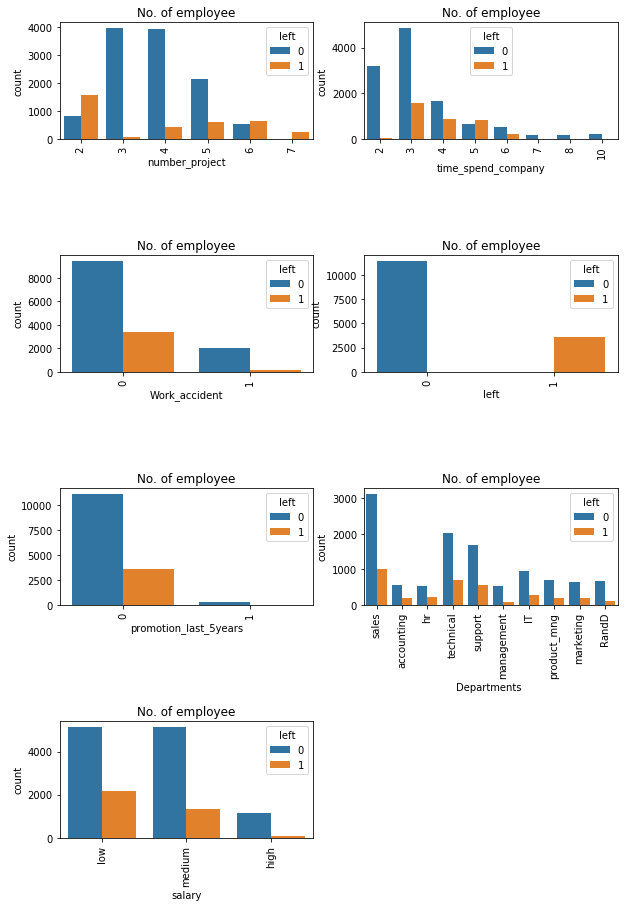

In [0]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

* Those employees who have the number of projects more than 5 were left the company.
* The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
* The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
* Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

## Data Analysis and Visualization Summary:
 Following features are most influencing a person to leave the company:

* **Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.**
* **Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.**
* **Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.**
* **Salary: Most of the employees that quit among the mid or low salary groups.** 

## Cluster Analysis

In [0]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

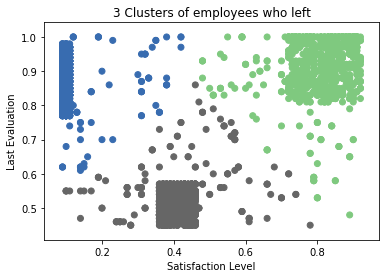

In [0]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

* High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
* Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
* Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

## Pre-Processing Data

In [0]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

In [0]:
#Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

## Model Building

In [0]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


<b> Source:  https://www.datacamp.com/community/tutorials/predicting-employee-churn-python